In [1]:

import torch
from config.eval.mnist import get_config as get_eval_config
import lib.utils.bookkeeping as bookkeeping
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

import lib.utils.utils as utils
import lib.models.models as models
import lib.models.model_utils as model_utils
import lib.sampling.sampling as sampling
import lib.sampling.sampling_utils as sampling_utils

def imgtrans(x):
    x = np.transpose(x, (1,2,0))
    return x

2023-09-04 12:48:57.429150: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
eval_cfg = get_eval_config()
train_cfg = bookkeeping.load_ml_collections(Path(eval_cfg.train_config_path))

for item in eval_cfg.train_config_overrides:
    utils.set_in_nested_dict(train_cfg, item[0], item[1])

S = train_cfg.data.S
device = torch.device(eval_cfg.device)

model = model_utils.create_model(train_cfg, device)

loaded_state = torch.load(Path(eval_cfg.checkpoint_path),
    map_location=device)

modified_model_state = utils.remove_module_from_keys(loaded_state['model'])
model.load_state_dict(modified_model_state)

model.eval()

In [3]:
n_samples = 9
sampler = sampling_utils.get_sampler(eval_cfg)
samples, x_hist, x0_hist = sampler.sample(model, n_samples, 10)

samples = samples.reshape(n_samples, 1, 32, 32)

1000it [09:21,  1.78it/s]


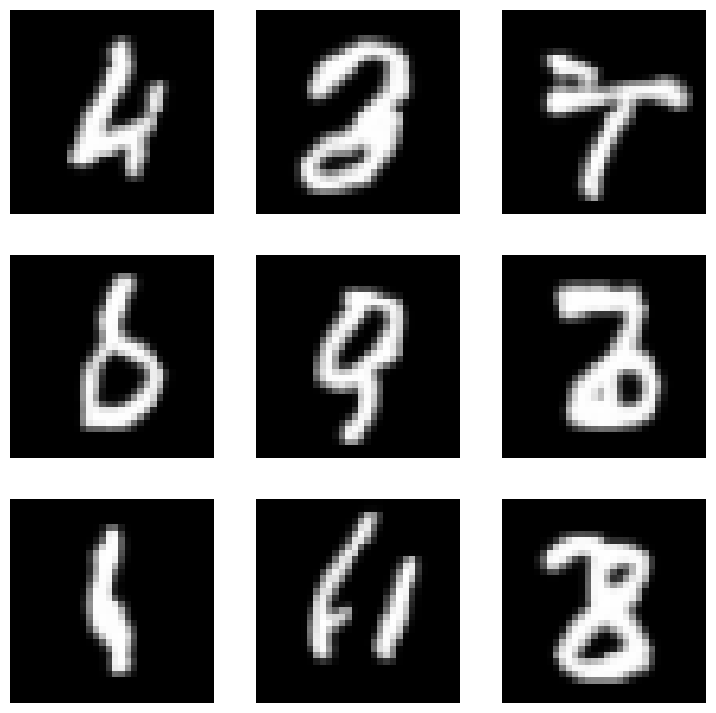

In [4]:
fig = plt.figure(figsize=(9, 9))  
for i in range(n_samples):
    plt.subplot(3, 3, 1 + i)
    plt.axis("off")
    plt.imshow(np.transpose(samples[i, ...], (1,2,0)), cmap="gray")


plt.savefig(f"/Users/paulheller/PythonRepositories/Master-Thesis/ContTimeDiscreteSpace/tauLDR/SavedModels/MNIST/samples_epoch_.png")
plt.show()
plt.close()